# Dynamics of Disease Transmission and Human Behavior Project

# Exploratory Data Analysis

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns

In [3]:
california = pd.read_csv("./drive/MyDrive/CS109 Project/state_level_data/California.csv",parse_dates=['date'],index_col=['date'])
new_york = pd.read_csv("./drive/MyDrive/CS109 Project/state_level_data/New York.csv",parse_dates=['date'],index_col=['date'])
ma = pd.read_csv("./drive/MyDrive/CS109 Project/state_level_data/Massachusetts.csv",parse_dates=['date'],index_col=['date'])

## Data Cleaning

Remove the final 5 rows because the missing cases don't make sense.

In [4]:
print(california.tail(10)) # remove the final 5 days since it's NA
print(new_york.tail(10)) # remove the final 5 days since it's NA
print(ma.tail(10)) # remove the final 5 days since it's NA

            JHU_cases  JHU_deaths  JHU_hospitalizations  up2date  \
date                                                               
2022-01-04    76786.0        94.0                1679.0      NaN   
2022-01-05    39356.0       126.0                1768.0      NaN   
2022-01-06    86590.0        32.0                1950.0      NaN   
2022-01-07   108391.0       234.0                1950.0      NaN   
2022-01-08    34364.0        17.0                1973.0      NaN   
2022-01-09        NaN         NaN                   NaN      NaN   
2022-01-10        NaN         NaN                   NaN      NaN   
2022-01-11        NaN         NaN                   NaN      NaN   
2022-01-12        NaN         NaN                   NaN      NaN   
2022-01-13        NaN         NaN                   NaN      NaN   

            gt_after covid vaccine  gt_side effects of vaccine  \
date                                                             
2022-01-04              606.538018                 

In [5]:
california = california.iloc[:-5, :]
new_york = new_york.iloc[:-5, :]
ma = ma.iloc[:-5, :]

Fill missing cases with 0 and flip the sign of negative cases.

In [6]:
for state in [california, new_york, ma]:
  state['JHU_cases']=state['JHU_cases'].fillna(0) # fill missing values with 0
  print(state['JHU_cases'][state['JHU_cases'] < 0])

date
2020-03-29   -2019.0
2021-06-29   -3935.0
Name: JHU_cases, dtype: float64
Series([], Name: JHU_cases, dtype: float64)
date
2020-09-03   -280.0
Name: JHU_cases, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
california['JHU_cases'][california['JHU_cases'] == -2019.0] = 2019.0
california['JHU_cases'][california['JHU_cases'] == -3935.0] = 3935.0
ma['JHU_cases'][ma['JHU_cases'] == -280.0] = 280

Text(0.5, 1.0, 'COVID-19 cases over time in Massachusetts')

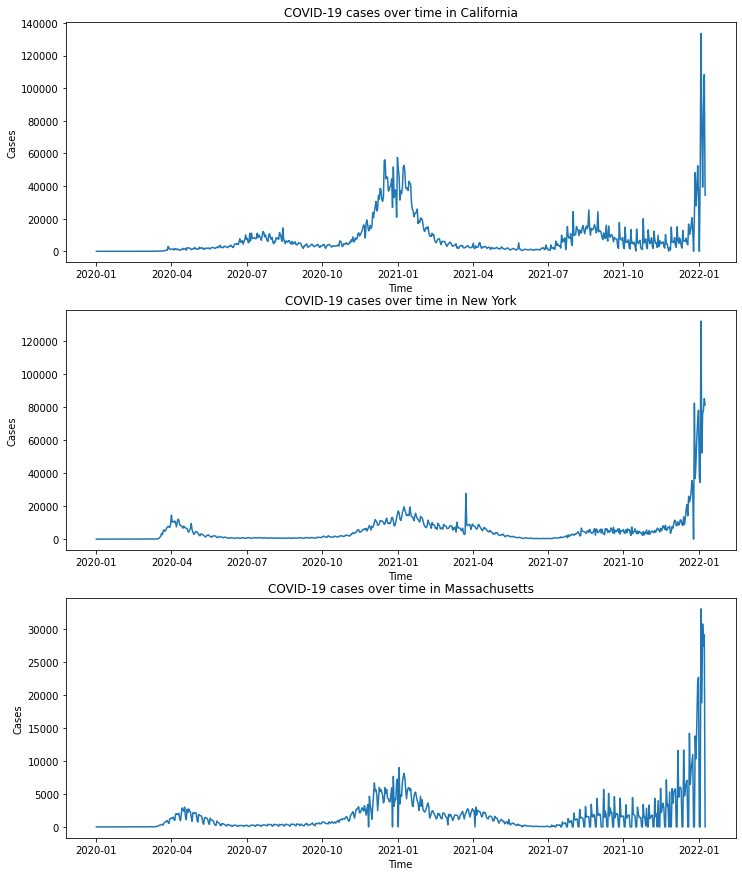

In [8]:
fig,axs = plt.subplots(3,1, figsize = (12,15))
axs[0].plot(california.index.values, california['JHU_cases'])
axs[1].plot(new_york.index.values, new_york['JHU_cases'])
axs[2].plot(ma.index.values, ma['JHU_cases'])
for i in range(3):
  axs[i].set_xlabel('Time')
axs[0].set_ylabel('Cases')
axs[1].set_ylabel('Cases')
axs[2].set_ylabel('Cases')
axs[0].set_title('COVID-19 cases over time in California')
axs[1].set_title('COVID-19 cases over time in New York')
axs[2].set_title('COVID-19 cases over time in Massachusetts')


We observe a lot of noise so we take the rolling average with a window of 5 to smooth the data.

In [9]:
#separate feature and outcome tables
cali_features=california.iloc[:,3:]
cali_outcomes=california.iloc[:,0]
ny_features=new_york.iloc[:,3:]
ny_outcomes=new_york.iloc[:,0]
ma_features=ma.iloc[:,3:]
ma_outcomes=ma.iloc[:,0]

cali_features.shape, cali_outcomes.shape

((739, 495), (739,))

In [10]:
# Window == number of days in rolling window over which to calculate mean
window = 5
cali_outcomes = cali_outcomes.transform(lambda x: x.rolling(window).mean())
ny_outcomes = ny_outcomes.transform(lambda x: x.rolling(window).mean())
ma_outcomes = ma_outcomes.transform(lambda x: x.rolling(window).mean())

cali_features.shape, cali_outcomes.shape

((739, 495), (739,))

Fill the NA at the beginning with 0

In [11]:
cali_outcomes = cali_outcomes.fillna(0)
ny_outcomes = ny_outcomes.fillna(0)
ma_outcomes = ma_outcomes.fillna(0)

Text(0.5, 1.0, 'COVID-19 cases over time in Massachusetts')

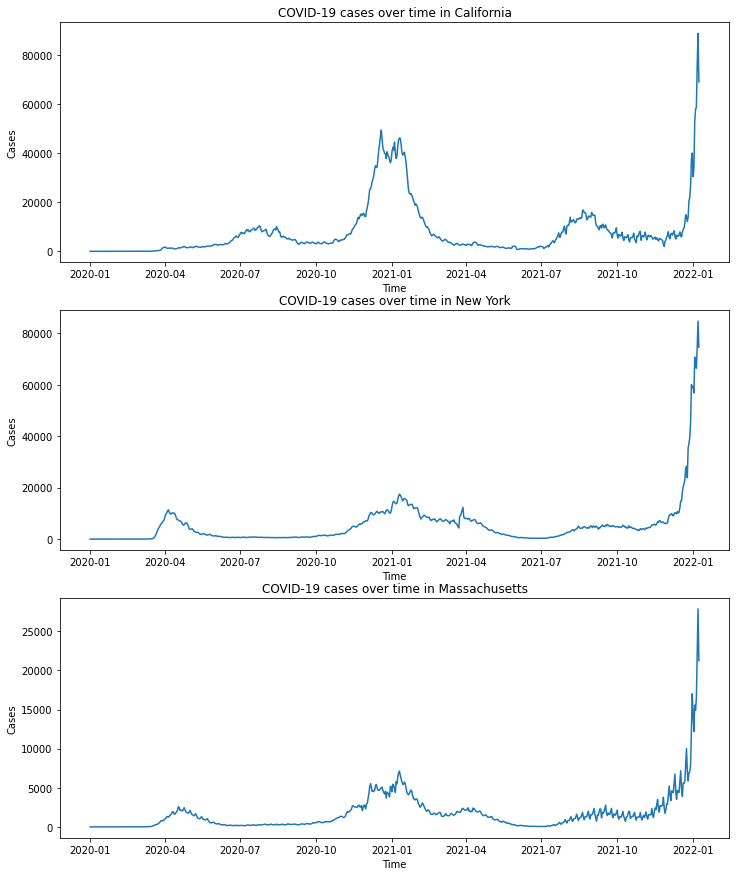

In [12]:
fig,axs = plt.subplots(3,1, figsize = (12,15))
axs[0].plot(california.index.values, cali_outcomes)
axs[1].plot(new_york.index.values, ny_outcomes)
axs[2].plot(ma.index.values, ma_outcomes)
for i in range(3):
  axs[i].set_xlabel('Time')
axs[0].set_ylabel('Cases')
axs[1].set_ylabel('Cases')
axs[2].set_ylabel('Cases')
axs[0].set_title('COVID-19 cases over time in California')
axs[1].set_title('COVID-19 cases over time in New York')
axs[2].set_title('COVID-19 cases over time in Massachusetts')


Drop Google Trend features with too many NAs.

In [13]:
missing_ratio = cali_features.isna().sum(axis=0) / cali_features.shape[0]
print(missing_ratio.reset_index().sort_values(by = 0, ascending = False))
cali_features_selected = cali_features[cali_features.columns[missing_ratio < 0.2]] 
cali_features_selected.shape

                           index         0
204           gt2_Hepatotoxicity  0.504736
386               gt2_Spasticity  0.504736
30                   gt2_Ageusia  0.504736
346                   gt2_Ptosis  0.504736
32   gt2_Allergic conjunctivitis  0.504736
..                           ...       ...
20                 gt_nose bleed  0.000000
21              gt_feeling tired  0.000000
22              gt_joints aching  0.000000
23                      gt_fever  0.000000
18                gt_sars-cov-2   0.000000

[495 rows x 2 columns]


(739, 428)

In [14]:
missing_ratio = ny_features.isna().sum(axis=0) / ny_features.shape[0]
print(missing_ratio.reset_index().sort_values(by = 0, ascending = False))
ny_features_selected = ny_features[ny_features.columns[missing_ratio < 0.2]] 
ny_features_selected.shape

                     index         0
328    gt2_Photodermatitis  0.519621
433    gt2_Viral pneumonia  0.507442
204     gt2_Hepatotoxicity  0.504736
371  gt2_Shallow breathing  0.504736
30             gt2_Ageusia  0.504736
..                     ...       ...
20           gt_nose bleed  0.000000
21        gt_feeling tired  0.000000
22        gt_joints aching  0.000000
23                gt_fever  0.000000
18          gt_sars-cov-2   0.000000

[495 rows x 2 columns]


(739, 428)

In [15]:
missing_ratio = ma_features.isna().sum(axis=0) / ma_features.shape[0]
print(missing_ratio.reset_index().sort_values(by = 0, ascending = False))
ma_features_selected = ma_features[ma_features.columns[missing_ratio < 0.2]] 
ma_features_selected.shape

                           index         0
328          gt2_Photodermatitis  0.695535
433          gt2_Viral pneumonia  0.635995
46                   gt2_Aphonia  0.519621
32   gt2_Allergic conjunctivitis  0.515562
117                 gt2_Crackles  0.514208
..                           ...       ...
20                 gt_nose bleed  0.000000
21              gt_feeling tired  0.000000
22              gt_joints aching  0.000000
23                      gt_fever  0.000000
18                gt_sars-cov-2   0.000000

[495 rows x 2 columns]


(739, 428)

Remove neighbor case features


In [16]:
gt_features = [col for col in cali_features_selected.columns if ('gt' in col or 'gt2' in col) and 'neighbor' not in col]
cali_features_selected = cali_features_selected[gt_features]

In [17]:
gt_features = [col for col in ny_features_selected.columns if ('gt' in col or 'gt2' in col) and 'neighbor' not in col]
ny_features_selected = ny_features_selected[gt_features]

In [18]:
gt_features = [col for col in ma_features_selected.columns if ('gt' in col or 'gt2' in col) and 'neighbor' not in col]
ma_features_selected = ma_features_selected[gt_features]

Imput missing values with knn imputer

In [19]:
#imputation using KNN
col_names=cali_features_selected.columns
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(cali_features_selected)
imputed_data = imputer.transform(cali_features_selected)
imputed_cali_gt = pd.DataFrame(imputed_data,columns=col_names)

col_names=ny_features_selected.columns
imputer.fit(ny_features_selected)
imputed_data = imputer.transform(ny_features_selected)
imputed_ny_gt = pd.DataFrame(imputed_data,columns=col_names)

col_names=ma_features_selected.columns
imputer.fit(ma_features_selected)
imputed_data = imputer.transform(ma_features_selected)
imputed_ma_gt = pd.DataFrame(imputed_data,columns=col_names)

## Exploratory Data Analysis

### Pearson Correlation Coefficients

In [20]:
# Pearson's correlation requires that each dataset be normally distributed
from scipy.stats.stats import pearsonr
from scipy.ndimage.interpolation import shift

In [21]:

corr_value = []
p_value = []
for i in range(len(imputed_cali_gt.columns)):
  res = pearsonr(imputed_cali_gt.iloc[:,i], cali_outcomes)
  corr_value.append(res[0])
  p_value.append(res[1])

res_tab = pd.DataFrame({"features" : imputed_cali_gt.columns, 
              "corr": corr_value,
              'abs_corr': [abs(x) for x in corr_value],
              "p_value": p_value})

res_tab['relation'] = np.where(res_tab['corr'] > 0, 'positive', 'negative')
res_tab = res_tab.sort_values(by='abs_corr', ascending = False)

res_tab.head()

,features,corr,abs_corr,p_value,relation
4,gt_how long does covid last,0.702711,0.702711,4.599268e-111,positive
3,gt_covid,0.700754,0.700754,3.385993e-110,positive
11,gt_covid symptoms,0.679652,0.679652,2.818283e-101,positive
197,gt2_Hypoxemia,0.646365,0.646365,1.228470e-88,positive
9,gt_loss of smell,0.571850,0.571850,2.138678e-65,positive


In [22]:
def pcorrcoef(feature, outcome, shift_by):
  corr_value = []
  p_value = []

  if shift_by != 0:
    shifted_data = shift(outcome.reset_index()['JHU_cases'].values, shift_by, cval = 0)
    outcome = shifted_data
  
  for i in range(len(feature.columns)):
    res = pearsonr(feature.iloc[:,i], outcome)
    corr_value.append(res[0])
    p_value.append(res[1])

  res_tab = pd.DataFrame({f"features_{shift_by}" : feature.columns, 
                f"corr_{shift_by}": corr_value,
                f"abs_corr_{shift_by}": [abs(x) for x in corr_value],
                f"p_value_{shift_by}": p_value})

  res_tab[f"relation_{shift_by}"] = np.where(res_tab[f"corr_{shift_by}"] > 0, 'positive', 'negative')
  # res_tab = res_tab.sort_values(by=f"abs_corr_{shift_by}", ascending = False)
  return res_tab

In [23]:
res_tab_0 = pcorrcoef(feature = imputed_cali_gt, outcome=cali_outcomes, shift_by=0)
res_tab_0 = res_tab_0.sort_values(by="abs_corr_0", ascending = False)
res_tab_0

,features_0,corr_0,abs_corr_0,p_value_0,relation_0
4,gt_how long does covid last,0.702711,0.702711,4.599268e-111,positive
3,gt_covid,0.700754,0.700754,3.385993e-110,positive
11,gt_covid symptoms,0.679652,0.679652,2.818283e-101,positive
197,gt2_Hypoxemia,0.646365,0.646365,1.228470e-88,positive
9,gt_loss of smell,0.571850,0.571850,2.138678e-65,positive
...,...,...,...,...,...
258,gt2_Nodule,-0.000734,0.000734,9.841109e-01,negative
54,gt2_Balance disorder,0.000410,0.000410,9.911241e-01,positive
275,gt2_Pelvic inflammatory disease,-0.000380,0.000380,9.917671e-01,negative
80,gt2_Canker sore,0.000376,0.000376,9.918601e-01,positive


Features with correlation coefficent > 0.5 have strong correlation with cases

Text(0, 0.5, 'features')

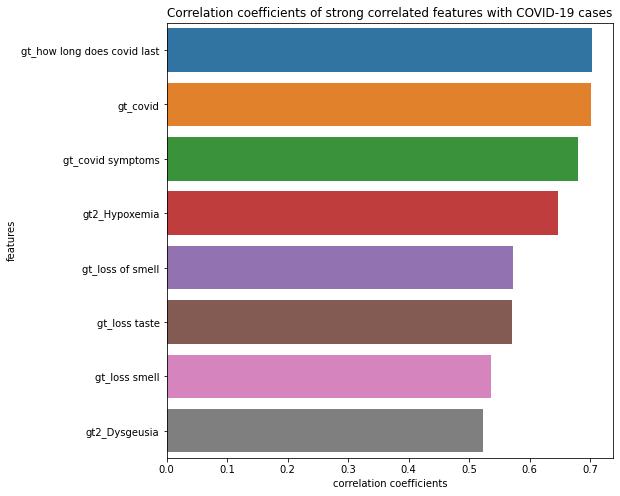

In [24]:
# features with correlation coefficent > 0.5 have strong correlation with cases
strong_cor = res_tab_0[res_tab_0['corr_0'] > 0.5]

fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.barplot(y = 'features_0', x = 'corr_0', data = strong_cor)
plt.title("Correlation coefficients of strong correlated features with COVID-19 cases")
plt.xlabel("correlation coefficients")
plt.ylabel("features")

Text(0, 0.5, 'features')

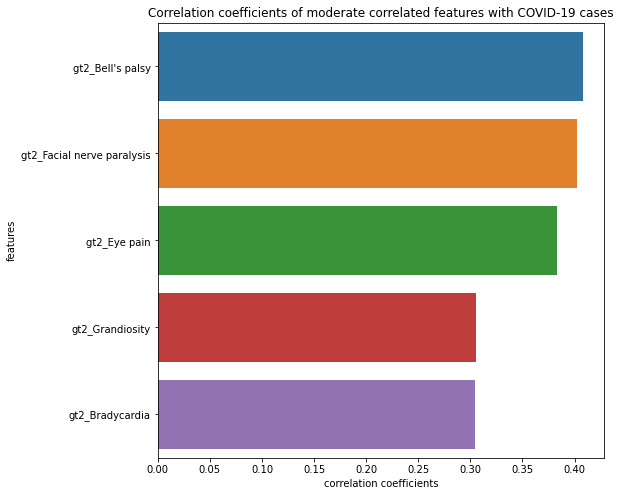

In [25]:
# features with correlation coefficent > 0.3 and < 0.5 have moderate correlation with cases
moderate_cor = res_tab_0[(res_tab_0['corr_0'] >= 0.3) & (res_tab_0['corr_0'] < 0.5)]

fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.barplot(y = 'features_0', x = 'corr_0', data = moderate_cor)
plt.title("Correlation coefficients of moderate correlated features with COVID-19 cases")
plt.xlabel("correlation coefficients")
plt.ylabel("features")

### Lead and Lag Pearson Correlation Coefficients

In [26]:
shift_sample = np.linspace(-14, 14, 29).astype('int')
for i in shift_sample:
  if i == shift_sample[0]:
    final_res_tab = pcorrcoef(feature = imputed_cali_gt, outcome=cali_outcomes, shift_by=i)
  else:
    tmp_res_tab = pcorrcoef(feature = imputed_cali_gt, outcome=cali_outcomes, shift_by=i)
    final_res_tab = pd.concat((final_res_tab,tmp_res_tab), axis = 1)

In [27]:
final_res_tab

,features_-14,corr_-14,abs_corr_-14,p_value_-14,relation_-14,features_-13,corr_-13,abs_corr_-13,p_value_-13,relation_-13,...,features_13,corr_13,abs_corr_13,p_value_13,relation_13,features_14,corr_14,abs_corr_14,p_value_14,relation_14
0,gt_after covid vaccine,-0.074379,0.074379,4.324524e-02,negative,gt_after covid vaccine,-0.069475,0.069475,5.906251e-02,negative,...,gt_after covid vaccine,0.153289,0.153289,2.854271e-05,positive,gt_after covid vaccine,0.159981,0.159981,1.243381e-05,positive
1,gt_side effects of vaccine,0.026793,0.026793,4.670747e-01,positive,gt_side effects of vaccine,0.034888,0.034888,3.435846e-01,positive,...,gt_side effects of vaccine,0.249163,0.249163,6.395263e-12,positive,gt_side effects of vaccine,0.252555,0.252555,3.232514e-12,positive
2,gt_effects of covid vaccine,0.127301,0.127301,5.226221e-04,positive,gt_effects of covid vaccine,0.135786,0.135786,2.137402e-04,positive,...,gt_effects of covid vaccine,0.377314,0.377314,2.040208e-26,positive,gt_effects of covid vaccine,0.376500,0.376500,2.661425e-26,positive
3,gt_covid,0.478635,0.478635,1.401468e-43,positive,gt_covid,0.488366,0.488366,1.487831e-45,positive,...,gt_covid,0.535658,0.535658,4.140852e-56,positive,gt_covid,0.523245,0.523245,3.550618e-53,positive
4,gt_how long does covid last,0.453184,0.453184,1.045040e-38,positive,gt_how long does covid last,0.481980,0.481980,2.987161e-44,positive,...,gt_how long does covid last,0.511747,0.511747,1.449103e-50,positive,gt_how long does covid last,0.503940,0.503940,7.546189e-49,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,gt2_Xeroderma,0.061131,0.061131,9.680151e-02,positive,gt2_Xeroderma,0.058807,0.058807,1.101952e-01,positive,...,gt2_Xeroderma,-0.039836,0.039836,2.794606e-01,negative,gt2_Xeroderma,-0.045104,0.045104,2.206995e-01,negative
375,gt2_Xerostomia,-0.106960,0.106960,3.601716e-03,negative,gt2_Xerostomia,-0.089814,0.089814,1.459200e-02,negative,...,gt2_Xerostomia,0.046457,0.046457,2.071463e-01,positive,gt2_Xerostomia,0.047727,0.047727,1.949829e-01,positive
376,gt2_Yawn,-0.081810,0.081810,2.615322e-02,negative,gt2_Yawn,-0.077098,0.077098,3.613151e-02,negative,...,gt2_Yawn,-0.093769,0.093769,1.076093e-02,negative,gt2_Yawn,-0.100712,0.100712,6.141052e-03,negative
377,gt2_hyperhidrosis,-0.172094,0.172094,2.532216e-06,negative,gt2_hyperhidrosis,-0.162456,0.162456,9.065498e-06,negative,...,gt2_hyperhidrosis,-0.139982,0.139982,1.346970e-04,negative,gt2_hyperhidrosis,-0.134815,0.134815,2.374120e-04,negative


We find that there the lag or lead correlation coefficients for a feature can vary between 0.01 and 0.30. 

In [28]:
select_abs_corr = [col for col in final_res_tab.columns if 'abs_corr' in col]
select_tab = final_res_tab[select_abs_corr]
select_tab['minmax_diff'] = select_tab.apply(lambda x: max(x)-min(x), axis=1)
select_tab[['minmax_diff']].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,minmax_diff
count,379.000000
mean,0.109449
std,0.058573
min,0.010472
25%,0.061671
50%,0.099199
75%,0.147630
max,0.298565


Now we select features by the maximum abs lag or lead correlation coefficients. Those features are correlated with the number of cases or lag trend of the number of cases or lead trend of the number of cases. They are useful for building a predictive model for COVID-19 cases.

Text(0, 0.5, 'features')

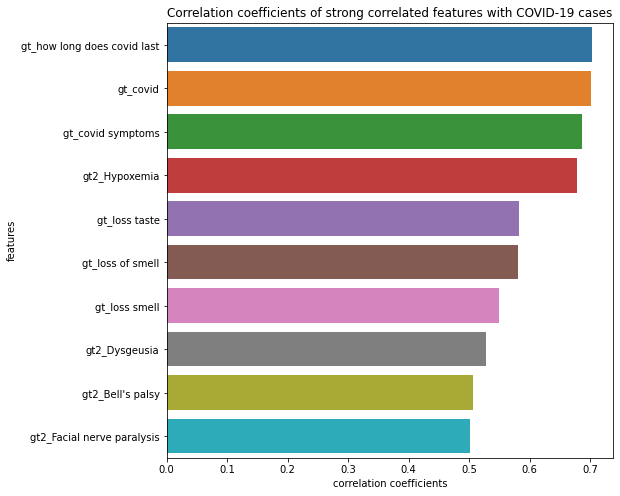

In [29]:
final_res_tab['max_abs_corr'] = select_tab.apply(lambda x: max(x), axis=1)
final_res_tab = final_res_tab.sort_values(by = 'max_abs_corr', ascending = False)

# features with correlation coefficent > 0.5 have strong correlation with cases
strong_cor = final_res_tab[final_res_tab['max_abs_corr'] > 0.5]

fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.barplot(y = 'features_0', x = 'max_abs_corr', data = strong_cor)
plt.title("Correlation coefficients of strong correlated features with COVID-19 cases")
plt.xlabel("correlation coefficients")
plt.ylabel("features")

Text(0, 0.5, 'features')

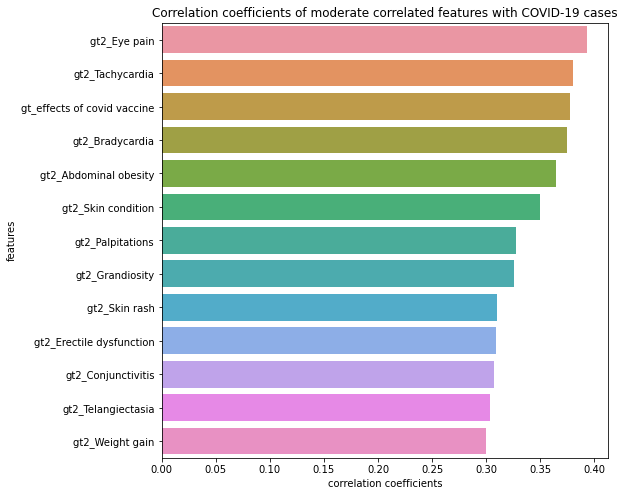

In [30]:
# features with correlation coefficent > 0.3 and < 0.5 have moderate correlation with cases
moderate_cor = final_res_tab[(final_res_tab['max_abs_corr'] < 0.5) & (final_res_tab['max_abs_corr'] >= 0.3)]

fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.barplot(y = 'features_0', x = 'max_abs_corr', data = moderate_cor)
plt.title("Correlation coefficients of moderate correlated features with COVID-19 cases")
plt.xlabel("correlation coefficients")
plt.ylabel("features")

Text(0, 0.5, 'features')

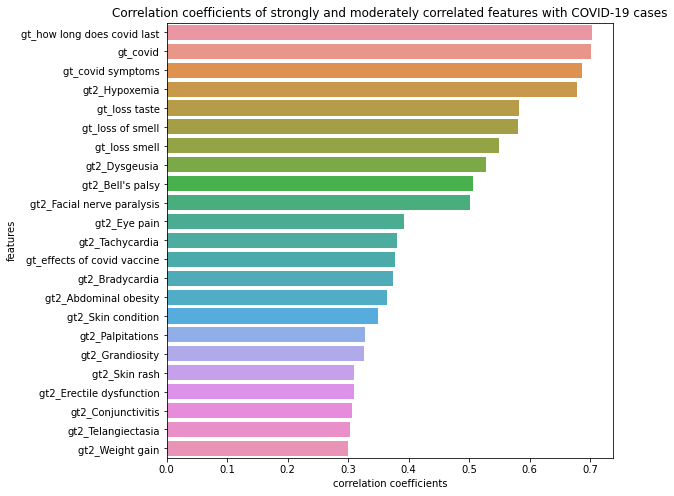

In [35]:
# features with correlation coefficent > 0.3 a
strong_moderate_cor = final_res_tab[final_res_tab['max_abs_corr'] >= 0.3]

fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.barplot(y = 'features_0', x = 'max_abs_corr', data = strong_moderate_cor)
plt.title("Correlation coefficients of strongly and moderately correlated features with COVID-19 cases")
plt.xlabel("correlation coefficients")
plt.ylabel("features")

In [31]:
moderate_features = moderate_cor['features_0'].values
print(moderate_features)
strong_features = strong_cor['features_0'].values
print(strong_features)

full_selected_features = list(strong_features) + list(moderate_features)
print(full_selected_features)

['gt2_Eye pain' 'gt2_Tachycardia' 'gt_effects of covid vaccine'
 'gt2_Bradycardia' 'gt2_Abdominal obesity' 'gt2_Skin condition'
 'gt2_Palpitations' 'gt2_Grandiosity' 'gt2_Skin rash'
 'gt2_Erectile dysfunction' 'gt2_Conjunctivitis' 'gt2_Telangiectasia'
 'gt2_Weight gain']
['gt_how long does covid last' 'gt_covid' 'gt_covid symptoms'
 'gt2_Hypoxemia' 'gt_loss taste' 'gt_loss of smell' 'gt_loss smell'
 'gt2_Dysgeusia' "gt2_Bell's palsy" 'gt2_Facial nerve paralysis']
['gt_how long does covid last', 'gt_covid', 'gt_covid symptoms', 'gt2_Hypoxemia', 'gt_loss taste', 'gt_loss of smell', 'gt_loss smell', 'gt2_Dysgeusia', "gt2_Bell's palsy", 'gt2_Facial nerve paralysis', 'gt2_Eye pain', 'gt2_Tachycardia', 'gt_effects of covid vaccine', 'gt2_Bradycardia', 'gt2_Abdominal obesity', 'gt2_Skin condition', 'gt2_Palpitations', 'gt2_Grandiosity', 'gt2_Skin rash', 'gt2_Erectile dysfunction', 'gt2_Conjunctivitis', 'gt2_Telangiectasia', 'gt2_Weight gain']


### Correlation among selected features

Display this heatmap to visualize the correlations between each pair of the google trend features

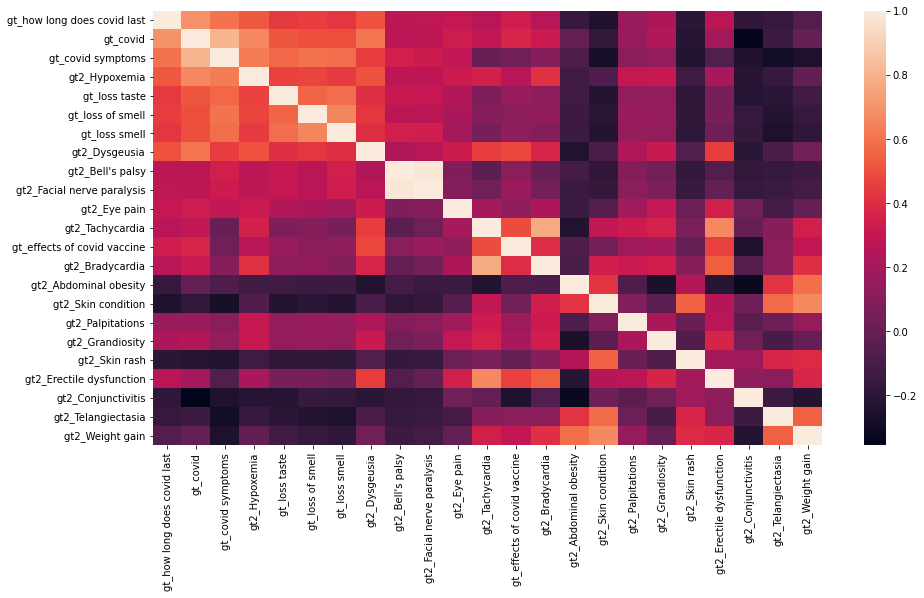

In [32]:
fig = plt.subplots(1,1, figsize = (15,8))
corr_res = imputed_cali_gt[full_selected_features].corr()
sns.heatmap(corr_res)

We observe two high correlated features: facial nerve paralysis and bell's palsy. We decide to delete Facial nerve paralysis. 

In [33]:
full_selected_features.remove('gt2_Facial nerve paralysis')
full_selected_features

['gt_how long does covid last',
 'gt_covid',
 'gt_covid symptoms',
 'gt2_Hypoxemia',
 'gt_loss taste',
 'gt_loss of smell',
 'gt_loss smell',
 'gt2_Dysgeusia',
 "gt2_Bell's palsy",
 'gt2_Eye pain',
 'gt2_Tachycardia',
 'gt_effects of covid vaccine',
 'gt2_Bradycardia',
 'gt2_Abdominal obesity',
 'gt2_Skin condition',
 'gt2_Palpitations',
 'gt2_Grandiosity',
 'gt2_Skin rash',
 'gt2_Erectile dysfunction',
 'gt2_Conjunctivitis',
 'gt2_Telangiectasia',
 'gt2_Weight gain']